## Projet 5 - Bottle Neck
**Importations**
- <a href='#C1'> Import librairies </a>
- <a href='#C2'> Import fichiers </a>

**Nettoyage données**
- <a href='#C3'> Affichage des tables </a>
- <a href='#C4'> Contrôle des tables </a>
- <a href='#C5'> Nettoyage table web </a>

**Merge des tables**
- <a href='#C6'> Merge des tables </a>

**Calculs**
- <a href='#C7'> Calculs CA </a>

**Étude des prix**
- <a href='#C8'> Boxplot et Zscore </a>


### <a name='C1'> Import librairies </a>

In [118]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

### <a name='C2'>Import fichiers </a>

In [119]:
prc = 'C:/Users/Zacca/OneDrive/Desktop/Projet_5/'

In [120]:
liaison = pd.read_excel(prc + 'liaison.xlsx')
erp = pd.read_excel(prc + 'erp.xlsx')
web = pd.read_excel(prc + 'web.xlsx')

### <a name='C3'> Affichage des tables </a>
On commence avec un première affichage des tables importé 

In [121]:
erp.head(3)

,product_id,onsale_web,price,stock_quantity,stock_status
0,3847,1,24.2,0,outofstock
1,3849,1,34.3,0,outofstock
2,3850,1,20.8,0,outofstock


In [122]:
liaison.head(3)

,product_id,id_web
0,3847,15298
1,3849,15296
2,3850,15300


In [123]:
web.head(3)

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,bon-cadeau-25-euros,0,0,0,0.0,10.0,taxable,NaN,1.0,2018-06-01 13:53:46,...,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&#038;p=4954,0.0,product,NaN,0.0
1,15298,0,0,0,0.0,6.0,taxable,NaN,2.0,2018-02-08 12:58:52,...,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&#038;p=3847,0.0,product,NaN,0.0
2,15296,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 13:49:41,...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&#038;p=3849,0.0,product,NaN,0.0


- Dans la table web on observe qu'il y a plusieurs colonnes qui ne serts pas aux requêtes du projet.
On peut aussi observer plusieurs valeurs NaN à traiter.

### <a name='C4'> Contrôle des tables </a>
Maintenant on vas observer d'une façon générale les numero des valeurs dans chaque table et les valeurs nulles

In [124]:
print('erp :',erp.shape)
print('liaison :',liaison.shape)
print('web :', web.shape)

erp : (825, 5)
liaison : (825, 2)
web : (1513, 28)


In [125]:
# affichage des valeurs nulles pour la table erp
erp.isnull().sum()

product_id        0
onsale_web        0
price             0
stock_quantity    0
stock_status      0
dtype: int64

In [126]:
# affichage des valeurs nulles pour la table liaison
liaison.isnull().sum()

product_id     0
id_web        91
dtype: int64

In [127]:
# affichage des valeurs nulles pour la table web
web.isnull().sum()

sku                        85
virtual                     0
downloadable                0
rating_count                0
average_rating             83
total_sales                83
tax_status                797
tax_class                1513
post_author                83
post_date                  83
post_date_gmt              83
post_content             1513
post_title                 83
post_excerpt              797
post_status                83
comment_status             83
ping_status                83
post_password            1513
post_name                  83
post_modified              83
post_modified_gmt          83
post_content_filtered    1513
post_parent                83
guid                       83
menu_order                 83
post_type                  83
post_mime_type            799
comment_count              83
dtype: int64

- On peut voir comment, dans la table erp, et liaison, on as le memes numero de lignes
- Dans la table web, et pour les valeurs id_web, on observer divers valeurs nulles à traiter

### <a name='C5'> Nettoyage table web </a>
On se concentre maintenant sur la table web pour effectuer les manipulation nécessaires pour préparer la table aux jointures

Pour simplifier la visualisation des la table, on vas supprimer les colonnes qui ne senmble pas être nécessaires à notres manipulations

In [128]:
# creation variable avec les colonnes a dropper
to_drop = ['virtual','downloadable','rating_count','average_rating','tax_class','post_author','post_date','post_modified','post_modified_gmt','post_content','post_content_filtered','post_parent','menu_order','post_mime_type','comment_count','post_date_gmt','post_excerpt','comment_status','ping_status','post_password']

In [129]:
# drop des colonnes contenu dans la variable to_drop
web.drop(columns=to_drop, inplace=True)

Maintenant on va prendre un valeur de la table pour la observer de plus près 

In [130]:
# recherche valeur dans la table
web[web['sku'] == 15298]

,sku,total_sales,tax_status,post_title,post_status,post_name,guid,post_type
1,15298,6.0,taxable,Pierre Jean Villa Saint-Joseph Préface 2018,publish,pierre-jean-villa-saint-joseph-preface-2018,https://www.bottle-neck.fr/?post_type=product&#038;p=3847,product
799,15298,6.0,NaN,Pierre Jean Villa Saint-Joseph Préface 2018,publish,pierre-jean-villa-saint-joseph-preface-2018,https://www.bottle-neck.fr/wp-content/uploads/2020/03/pierre-jean-villa-saint-joseph-preface-201...,attachment


- On peut observer qu'il y a un repetition qui est lié a la colonne post_type

On vas alors procéder à la suppression des doublons liés a la problématique de la colonne post_type

In [131]:
# suppression des doublons
web.drop(web.loc[web['post_type'] == 'attachment'].index, inplace = True)

Maintenant on va verifier si la valeur 'sku' est unique, où si on as encore des doublons

In [132]:
# on verifie si la colonne sku contiennent des valeur distinctes
web.sku.is_unique

False

On va controller quelles sont les doublons restantes

In [133]:
web.loc[web['sku'].duplicated(keep=False),:]

,sku,total_sales,tax_status,post_title,post_status,post_name,guid,post_type
178,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
179,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
227,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
230,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
231,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
792,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
793,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
794,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
795,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


On peut maintenant verifier pour chaque colonnes le nombre des valeurs nulles

In [134]:
# contrôle des valeurs nulles dans la table web
web.isnull().sum()

sku            85
total_sales    83
tax_status     83
post_title     83
post_status    83
post_name      83
guid           83
post_type      83
dtype: int64

- on observe que les valeurs nulles dans la colonne 'sku' sont 85, contre 83 des autres colonnes

On essaye d'extraire les deux valeurs qui ne sont pas nulles

In [135]:
# verfication des valeurs nulles
web.loc[web['sku'].duplicated(keep=False),:].sort_values(by='post_title')

,sku,total_sales,tax_status,post_title,post_status,post_name,guid,post_type
471,NaN,0.0,taxable,Pierre Jean Villa Condrieu Jardin Suspendu 2018,publish,pierre-jean-villa-condrieu-suspendu-2018,https://www.bottle-neck.fr/?post_type=product&#038;p=5075,product
470,NaN,0.0,taxable,Pierre Jean Villa Côte Rôtie Fongeant 2017,publish,pierre-jean-villa-cote-rotie-fongeant-2017,https://www.bottle-neck.fr/?post_type=product&#038;p=5070,product
178,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
179,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
227,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
792,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
793,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
794,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
795,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- on as deux produit qui ont pas leur web_id

On étude un autre valeur pour voir si on peut arriver aux valeurs nulles

In [136]:
# on augmente les caractères pour bien visualiser la string
pd.set_option("display.max_colwidth", 100)
# on prend un valeur de la colonne 'guid'
web.loc[1]

sku                                                                15298
total_sales                                                          6.0
tax_status                                                       taxable
post_title                   Pierre Jean Villa Saint-Joseph Préface 2018
post_status                                                      publish
post_name                    pierre-jean-villa-saint-joseph-preface-2018
guid           https://www.bottle-neck.fr/?post_type=product&#038;p=3847
post_type                                                        product
Name: 1, dtype: object

Si on observe le valeur de la colonne guid, on voit 4 nombres, on vas verifier si on peut etablir a qoi ils se referent

In [137]:
# recherche valeur dans la table liaison
liaison[liaison['product_id'] == 3847]

,product_id,id_web
0,3847,15298


En effet, si on considère le code trouvé preceprécédemment, on peut verifier que il représente le product_id

In [138]:
# filtre pour trouver le guid des valeurs qui ont pas leur sku
web.loc[web['sku'].duplicated(keep=False),:].sort_values(by='post_title').head(2)

,sku,total_sales,tax_status,post_title,post_status,post_name,guid,post_type
471,NaN,0.0,taxable,Pierre Jean Villa Condrieu Jardin Suspendu 2018,publish,pierre-jean-villa-condrieu-suspendu-2018,https://www.bottle-neck.fr/?post_type=product&#038;p=5075,product
470,NaN,0.0,taxable,Pierre Jean Villa Côte Rôtie Fongeant 2017,publish,pierre-jean-villa-cote-rotie-fongeant-2017,https://www.bottle-neck.fr/?post_type=product&#038;p=5070,product


In [139]:
# filtre pour trouver le valeurs sku dans la table liaison
liaison[liaison['product_id'] == 5070]

,product_id,id_web
486,5070,NaN


In [140]:
liaison[liaison['product_id'] == 5075]

,product_id,id_web
487,5075,NaN


Les deux valeurs ont pas un id_web, alors on va en creer deux pour fixe les problème 

In [141]:
# on verfiie que il n'y a pas des elements avec cette sku
web[web['sku'] == 10001]

,sku,total_sales,tax_status,post_title,post_status,post_name,guid,post_type


In [142]:
web[web['sku'] == 10002]

,sku,total_sales,tax_status,post_title,post_status,post_name,guid,post_type


In [143]:
# on insere les nouveaux valeurs dans la table web et liaison
web.at[470,'sku'] = 10001
web.at[471,'sku'] = 10002
liaison.at[486,'id_web']  = 10001 
liaison.at[487,'id_web']  = 10002

In [144]:
# on verifie que le changement à été enregistré 
web[web['sku'] == 10001]

,sku,total_sales,tax_status,post_title,post_status,post_name,guid,post_type
470,10001,0.0,taxable,Pierre Jean Villa Côte Rôtie Fongeant 2017,publish,pierre-jean-villa-cote-rotie-fongeant-2017,https://www.bottle-neck.fr/?post_type=product&#038;p=5070,product


On verifie a nouveaux les valeurs doublons et les valeurs nulles

In [145]:
# recherche de valeurs doublons
web.loc[web['sku'].duplicated(keep=False),:]

,sku,total_sales,tax_status,post_title,post_status,post_name,guid,post_type
178,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
179,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
227,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
230,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
231,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
792,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
793,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
794,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
795,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [146]:
# recherche des valeurs nulles
web.isnull().sum()

sku            83
total_sales    83
tax_status     83
post_title     83
post_status    83
post_name      83
guid           83
post_type      83
dtype: int64

In [147]:
# drop des lignes NaN de la table
web.dropna(inplace=True)

On change le nom de la colonne sku en id_web pour simplifier les rapprochements

In [148]:
# changement de nom de la colonne sku
web.rename(columns={'sku' : 'id_web'}, inplace=True)

### <a name='C6'> Merge des tables </a>
On vas faire les rapprochements des tables

Tout d'abord on vas contrôler si on trouve les clés primaries 


In [149]:
# controle le product_id
erp.product_id.is_unique

True

In [150]:
# controle id_web
web.id_web.is_unique

True

Maintenant on vas procéder avec les jointures

In [151]:
# merge entre table erp et liaison
erp_lia = pd.merge(erp, liaison, on='product_id', how ='outer')

In [152]:
# merge entre table erp_lia et table web
table_merge = pd.merge(erp_lia, web, on= 'id_web', how = 'outer' )

In [153]:
# affichage de la table_merge
table_merge.head(3)

,product_id,onsale_web,price,stock_quantity,stock_status,id_web,total_sales,tax_status,post_title,post_status,post_name,guid,post_type
0,3847,1,24.2,0,outofstock,15298,6.0,taxable,Pierre Jean Villa Saint-Joseph Préface 2018,publish,pierre-jean-villa-saint-joseph-preface-2018,https://www.bottle-neck.fr/?post_type=product&#038;p=3847,product
1,3849,1,34.3,0,outofstock,15296,0.0,taxable,Pierre Jean Villa Saint-Joseph Rouge Tildé 2017,publish,pierre-jean-villa-saint-joseph-tilde-2017,https://www.bottle-neck.fr/?post_type=product&#038;p=3849,product
2,3850,1,20.8,0,outofstock,15300,0.0,taxable,Pierre Jean Villa Crozes-Hermitage Accroche Coeur 2018,publish,pierre-jean-villa-croze-hermitage-accroche-coeur-2018,https://www.bottle-neck.fr/?post_type=product&#038;p=3850,product


### <a name='C7'> Calculs </a>
Maintenant on va proceder aux calculs des chiffre d'affaires

Tout d'abord on vas créer un nouvelle colonne avec le calcul de CA pour chaque produit

In [154]:
# nouvelle colonne appelé CA 
table_merge['CA'] = table_merge['price'] * table_merge['total_sales']

Maintenant on vas faire la somme des tous les CA pous afficher le CA total

In [155]:
# somme des CA
Chiffre_Affaires = table_merge['CA'].sum()

In [156]:
# affichage du total
print('Le CA total est de: ', Chiffre_Affaires, '€')

Le CA total est de:  70568.6 €


### <a name='C8'> Etude des prix </a>
On vois de plus près le comportement des outliers et des valeurs aberrantes

In [157]:
table_merge['price'].describe()

count    825.000000
mean      32.415636
std       26.795849
min        5.200000
25%       14.600000
50%       24.400000
75%       42.000000
max      225.000000
Name: price, dtype: float64

On vas essayer de visualiser le comportement des prix avec un boxplot

<AxesSubplot:xlabel='price'>

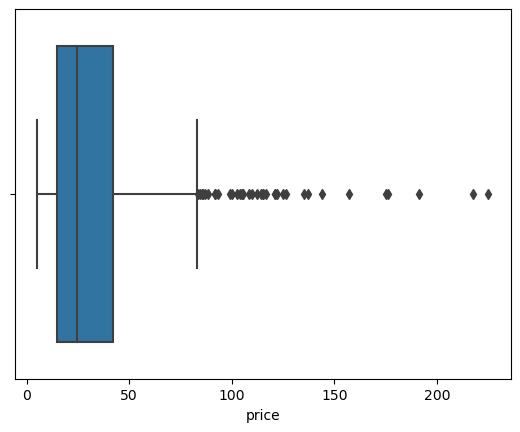

In [158]:
# creation et affichage du box plot
sns.boxplot(x=table_merge['price'])

On peut observer que les valeurs se concentrent au dessous de 50 euros, mais on vois plusieurs outliers

On va essayer aussi avec la méthode du Zscore, pour créer une graphique en nuage de points qui va mettre en evidence les outliers

In [159]:
# on vas créer une nouvelle colonne pour les valeurs ZScore
table_merge['zscore'] = stats.zscore(table_merge['price'])

In [160]:
# on vas créer une variable pour pouvoir mettre en valeurs les outliers
table_zscore = table_merge.loc[(table_merge['zscore'] > 1.96) | (table_merge['zscore'] < -1.96)]

In [161]:
# affichage des outliers
table_merge.loc[(table_merge['zscore'] > 1.96) | (table_merge['zscore'] < -1.96)]

,product_id,onsale_web,price,stock_quantity,stock_status,id_web,total_sales,tax_status,post_title,post_status,post_name,guid,post_type,CA,zscore
19,4055,0,86.1,0,outofstock,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.004674
30,4594,1,144.0,0,outofstock,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.166767
53,6324,0,92.0,18,instock,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.224990
152,4115,1,100.0,11,instock,15382,0.0,taxable,Zind-Humbrecht Riesling Grand Cru Rangen De Thann Clos Saint-Urbain 2017,publish,zind-humbrecht-riesling-gc-rangen-thann-clos-st-urbain-2017,https://www.bottle-neck.fr/?post_type=product&#038;p=4115,product,0.0,2.523725
154,4132,1,88.4,5,instock,11668,0.0,taxable,Zind-Humbrecht Pinot Gris Grand Cru Rangen De Thann Clos Saint-Urbain 2012,publish,zind-humbrecht-pinot-gris-grand-cru-rangen-de-thann-clos-saint-urbain-2012,https://www.bottle-neck.fr/?post_type=product&#038;p=4132,product,0.0,2.090560
289,4352,1,225.0,0,outofstock,15940,5.0,taxable,Champagne Egly-Ouriet Grand Cru Millésimé 2008,publish,champagne-egly-ouriet-grand-cru-millesime-2008,https://www.bottle-neck.fr/?post_type=product&#038;p=4352,product,1125.0,7.191457
291,4355,1,126.5,2,instock,12589,11.0,taxable,Champagne Egly-Ouriet Grand Cru Blanc de Noirs,publish,champagne-egly-ouriet-grand-cru-brut-blanc-de-noirs,https://www.bottle-neck.fr/?post_type=product&#038;p=4355,product,1391.5,3.513284
295,4359,1,85.6,0,outofstock,13853,1.0,taxable,Champagne Larmandier-Bernier Grand Cru Les Chemins d'Avize 2011,publish,champagne-larmandier-bernier-grand-cru-vieilles-chemins-avize-2011,https://www.bottle-neck.fr/?post_type=product&#038;p=4359,product,85.6,1.986003
308,4402,1,176.0,8,instock,3510,13.0,taxable,Cognac Frapin VIP XO,publish,cognac-frapin-vip-xo,https://www.bottle-neck.fr/?post_type=product&#038;p=4402,product,2288.0,5.361706
309,4404,1,108.5,2,instock,3507,2.0,taxable,Cognac Frapin Château de Fontpinot XO,publish,cognac-frapin-fontpinot-xo,https://www.bottle-neck.fr/?post_type=product&#038;p=4404,product,217.0,2.841131


<AxesSubplot:ylabel='price'>

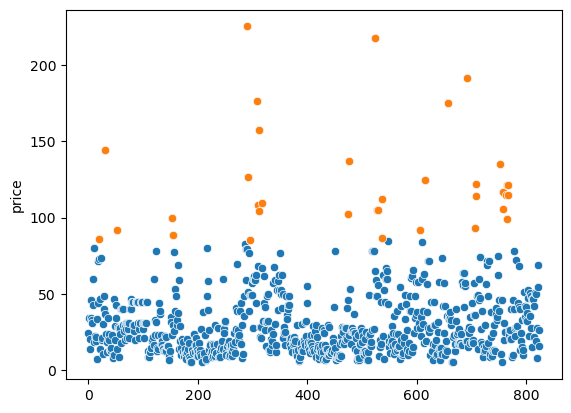

In [162]:
# Creation du graphique en nuage de points 
sns.scatterplot(data = table_merge, x=table_merge.index, y='price')
sns.scatterplot(data = table_zscore, x=table_zscore.index ,  y='price')